In [1]:
import sys
# Append the directory, not the file
sys.path.append('/Volumes/Maestria/GitHub/NEO/NEO/API_test/')
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from joblib import dump, load
import os
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


import pickle as pkl
import sys


import dataprocess as dp

In [2]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/nearest-earth-objects(1910-2024).csv')

df.drop(columns=['neo_id', 'orbiting_body', 'name'], inplace=True)
le = LabelEncoder()
df['is_hazardous'] = le.fit_transform(df['is_hazardous'])
df = df.dropna()
df_test = df.copy()
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df_test.drop('is_hazardous', axis=1), df_test['is_hazardous'])
df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

df_target = df['is_hazardous']
df_target_array = df_target.values
df_features = df.drop(columns=['is_hazardous'])
df_features_array = df_features.values

preprocess = ColumnTransformer([
    ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
])

pipeline = Pipeline([
    ('preprocess', preprocess)])

df_preprocessed = pipeline.fit_transform(df)
df_preprocessed


X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, df_target_array, test_size=0.2, random_state=42)

In [3]:
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Accuracy: 0.8598183112436867
Recall: 0.9462723017434367
F1 score: 0.8709007757503863
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.77      0.85     59040
           1       0.81      0.95      0.87     58964

    accuracy                           0.86    118004
   macro avg       0.87      0.86      0.86    118004
weighted avg       0.87      0.86      0.86    118004



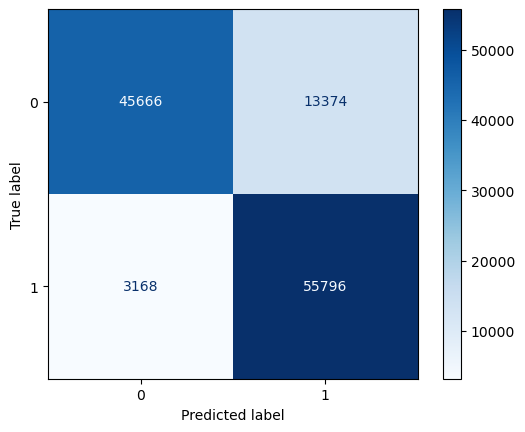

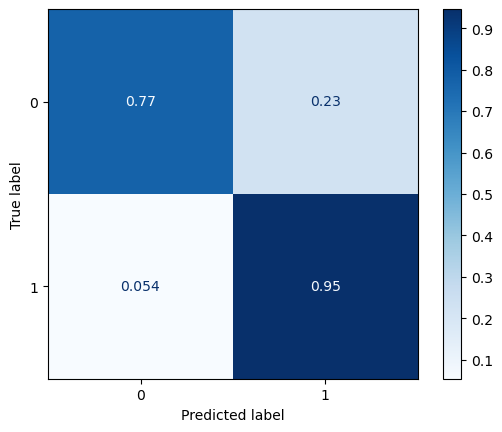

In [4]:
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.get_params()

indices = np.random.choice(X_train.shape[0], 20000, replace=False)  

X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

bestann = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

bestann.fit(X_train_sample, y_train_sample)

predictions = bestann.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

print(f'Classification Report: \n {classification_report(y_test, predictions)}')

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

cm2 = cm / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap='Blues')
plt.show()

# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,)],
#     'activation': ['relu'],
#     'alpha': [0.0001, 0.001],
#     'learning_rate_init': [0.001, 0.01]
# }

# grid_search = GridSearchCV(mlp, param_grid, cv=5)
# grid_search.fit(X_train_sample, y_train_sample)

# print(f'Best parameters: {grid_search.best_params_}')
# print(f'Best Score: {grid_search.best_score_}')
# print(f'Best Estimator: {grid_search.best_estimator_} ')

# best_randomf_std = grid_search.best_estimator_

In [6]:
bestann = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

Accuracy: 0.859335276770279
Recall: 0.9560579336544333
F1 score: 0.8716687927635394
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.76      0.84     59040
           1       0.80      0.96      0.87     58964

    accuracy                           0.86    118004
   macro avg       0.87      0.86      0.86    118004
weighted avg       0.87      0.86      0.86    118004



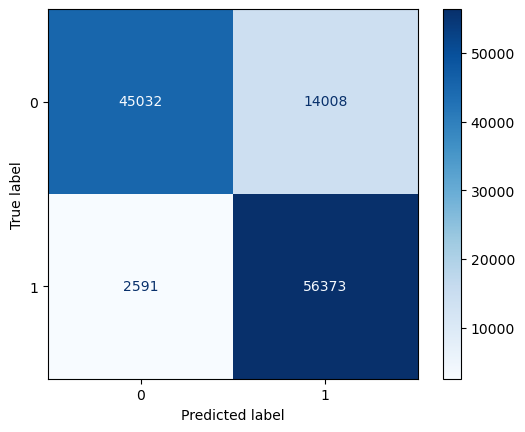

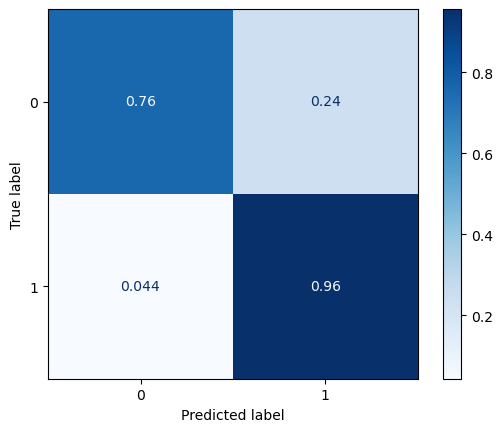

In [7]:

bestann.fit(X_train_sample, y_train_sample)

predictions = bestann.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

print(f'Classification Report: \n {classification_report(y_test, predictions)}')

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

cm2 = cm / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap='Blues')
plt.show()


# best_randomf_std.fit(X_train_sample_std, y_train_sample_std)

# predictions = best_randomf_std.predict(X_test_std)

# accuracy = accuracy_score(y_test_std, predictions)
# recall = recall_score(y_test_std, predictions)
# f1 = f1_score(y_test_std, predictions)

# print(f"Accuracy: {accuracy}")
# print(f"Recall: {recall}")
# print(f"F1 score: {f1}")


# print(f'Classification Report: \n {classification_report(y_test_std, predictions)}')

# cm = confusion_matrix(y_test_std, predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap='Blues')
# plt.show()

# cm2 = cm / cm.sum(axis=1)[:, np.newaxis]
